In [20]:
%matplotlib inline


# Pass flow plot

This example shows how to plot the passes from a team as a pass flow plot.


In [21]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from mplsoccer import Pitch, FontManager, Sbopen

rcParams['text.color'] = '#c7d5cc'  # set the default text color

# get event dataframe for game 7478
parser = Sbopen()
df, related, freeze, tactics = parser.event(3773672)

Boolean mask for filtering the dataset by team



In [28]:
team1, team2 = df.team_name.unique()
mask_team1 = (df.type_name == 'Pass') & (df.team_name == team1) 

Filter dataset to only include one teams passes and get boolean mask for the completed passes



In [23]:
df_pass = df.loc[mask_team1, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]
mask_complete = df_pass.outcome_name.isnull()

Setup the pitch and number of bins



In [24]:
pitch = Pitch(pitch_type='statsbomb',  line_zorder=2, line_color='#c7d5cc', pitch_color='#22312b')
bins = (6, 4)

Plotting using a single color and length



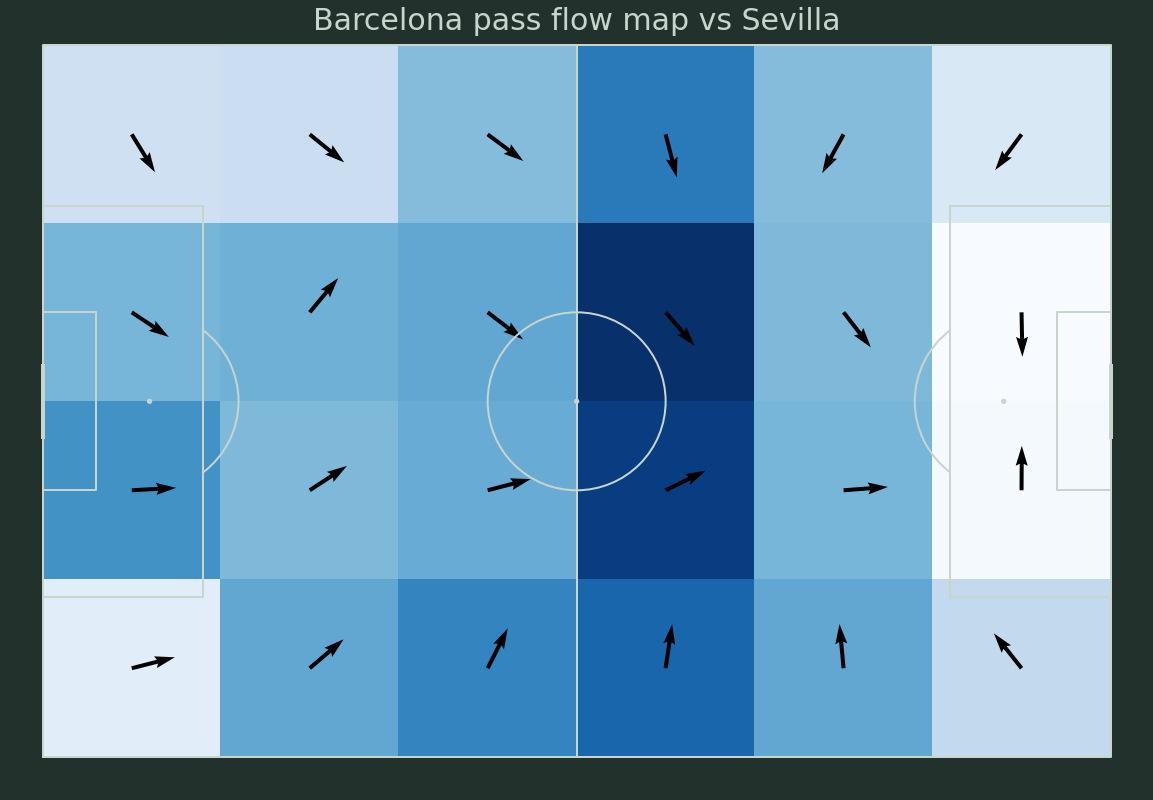

In [25]:
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(df_pass.x, df_pass.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Blues')
# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(df_pass.x, df_pass.y, df_pass.end_x, df_pass.end_y,
                color='black', arrow_type='same',
                arrow_length=5, bins=bins, ax=ax)
ax_title = ax.set_title(f'{team1} pass flow map vs {team2}', fontsize=30, pad=-20)

Plotting using a cmap and scaled arrows



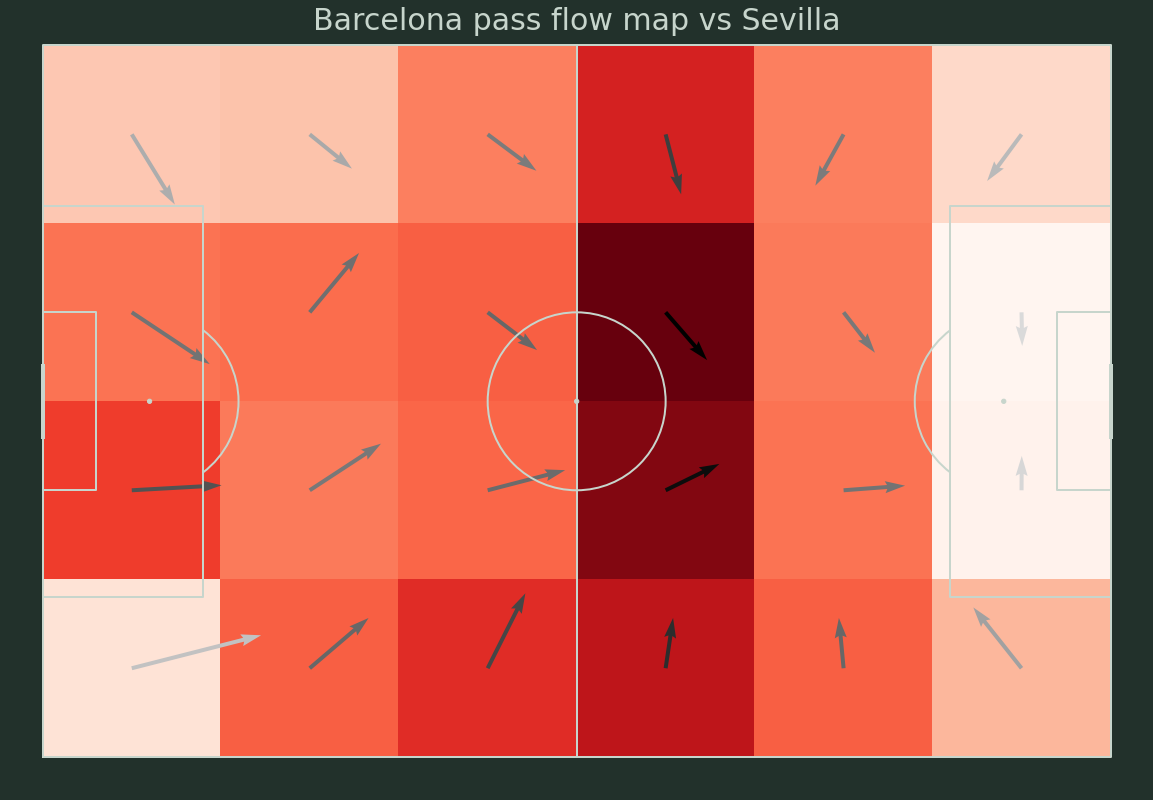

In [26]:
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(df_pass.x, df_pass.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Reds')
# plot the pass flow map with a custom color map and the arrows scaled by the average pass length
# the longer the arrow the greater the average pass length in the cell
grey = LinearSegmentedColormap.from_list('custom cmap', ['#DADADA', 'black'])
fm = pitch.flow(df_pass.x, df_pass.y, df_pass.end_x, df_pass.end_y, cmap=grey,
                arrow_type='scale', arrow_length=15, bins=bins, ax=ax)
ax_title = ax.set_title(f'{team1} pass flow map vs {team2}', fontsize=30, pad=-20)

Plotting with arrow lengths equal to average distance



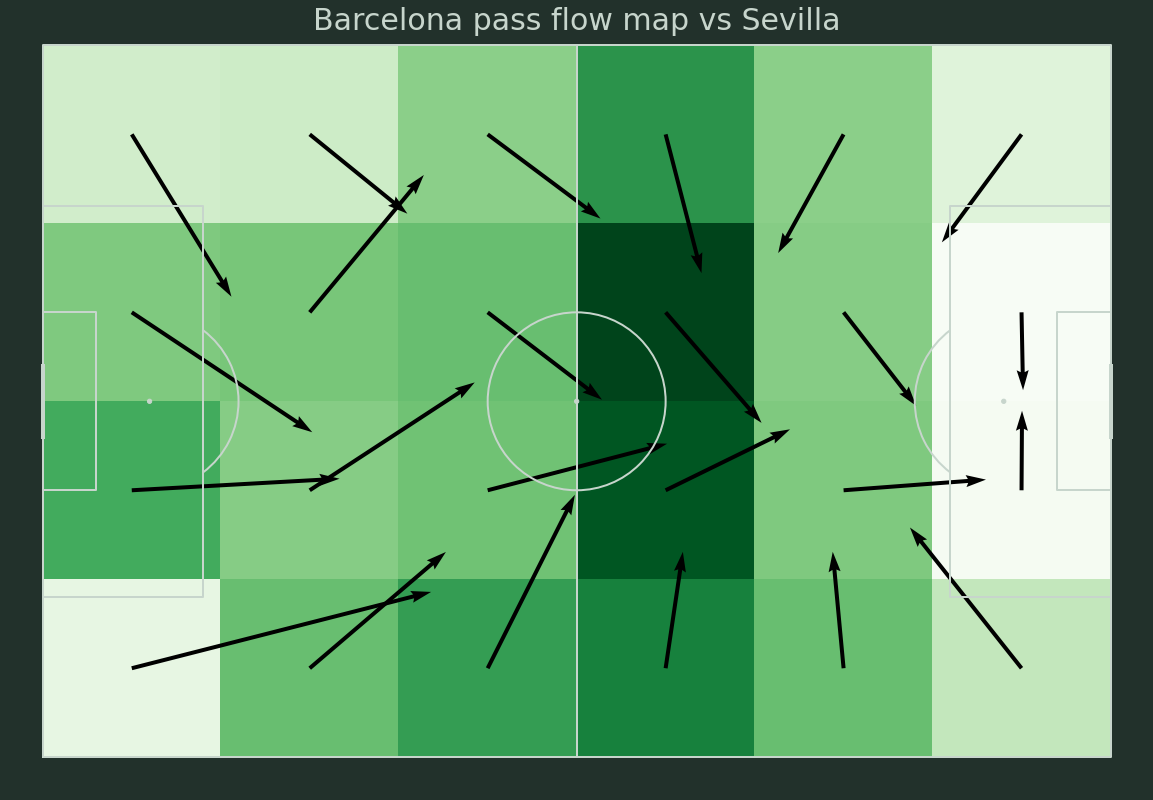

In [27]:
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(df_pass.x, df_pass.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Greens')
# plot the pass flow map with a single color and the
# arrow length equal to the average distance in the cell
fm = pitch.flow(df_pass.x, df_pass.y, df_pass.end_x, df_pass.end_y, color='black',
                arrow_type='average', bins=bins, ax=ax)
ax_title = ax.set_title(f'{team1} pass flow map vs {team2}', fontsize=30, pad=-20)
plt.savefig('Barcelona_pass_flow.png')

Plotting with an endnote/title



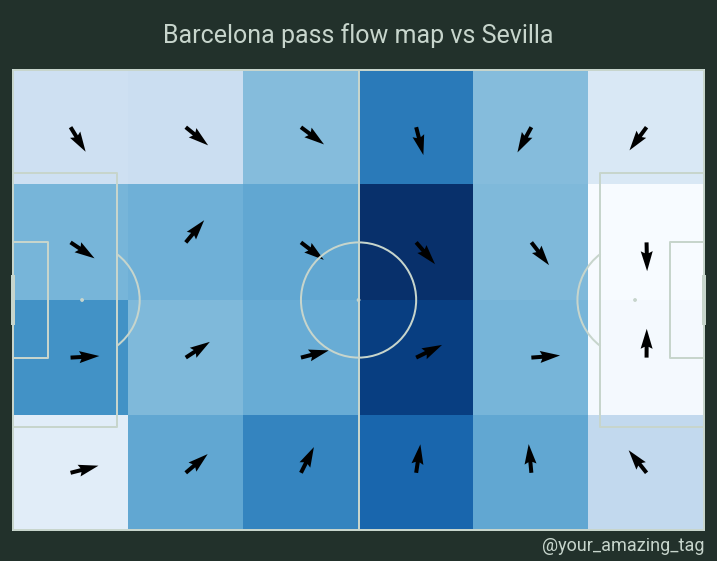

In [8]:
# We will use mplsoccer's grid function to plot a pitch with a title axis.
pitch = Pitch(pitch_type='statsbomb', pad_bottom=1, pad_top=1,
              pad_left=1, pad_right=1,
              line_zorder=2, line_color='#c7d5cc', pitch_color='#22312b')
fig, axs = pitch.grid(figheight=8, endnote_height=0.03, endnote_space=0,
                      title_height=0.1, title_space=0, grid_height=0.82,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False)
fig.set_facecolor('#22312b')

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(df_pass.x, df_pass.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=axs['pitch'], cmap='Blues')
# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(df_pass.x, df_pass.y, df_pass.end_x, df_pass.end_y,
                color='black', arrow_type='same',
                arrow_length=5, bins=bins, ax=axs['pitch'])

# title / endnote
font = FontManager()  # default is loading robotto font from google fonts
axs['title'].text(0.5, 0.5, f'{team1} pass flow map vs {team2}',
                  fontsize=25, fontproperties=font.prop, va='center', ha='center')
axs['endnote'].text(1, 0.5, 'David González Álvarez',
                    fontsize=18, fontproperties=font.prop, va='center', ha='right')

plt.show()  # If you are using a Jupyter notebook you do not need this line